#Predicting sentiment from product reviews

##Fire up Pandas

In [1]:
import pandas
import sklearn
import numpy as np

##Read some product review data
Loading reviews for a set of baby products.

In [2]:
products = pandas.read_csv('amazon_baby.csv')

In [3]:
products.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


##Some quick data cleaning
Let's look at some of the reviews:

In [4]:
products['review'][0]

'These flannel wipes are OK, but in my opinion not worth keeping.  I also ordered someImse Vimse Cloth Wipes-Ocean Blue-12 countwhich are larger, had a nicer, softer texture and just seemed higher quality.  I use cloth wipes for hands and faces and have been usingThirsties 6 Pack Fab Wipes, Boyfor about 8 months now and need to replace them because they are starting to get rough and have had stink issues for a while that stripping no longer handles.'

Look at reviews 30 to 50, we see some bad data for review #38

In [5]:
products['review'][30:50]

30    Beautiful little book.  A great little short s...
31    This book is so worth the money. It says 9+ mo...
32    we just got this book for our one-year-old and...
33    The book is colorful and is perfect for 6month...
34    The book is cute, and we are huge fans of Lama...
35    What a great book for babies!  I\'d been looki...
36    My son loved this book as an infant.  It was p...
37    Our baby loves this book & has loved it for a ...
38                                                  NaN
39    My son likes brushing elmo\'s teeth. Almost to...
40    This was a birthday present for my 2 year old ...
41    This bear is absolutely adorable and I would g...
42    My baby absolutely loves Elmo and so this book...
43    I bought two for recent baby showers!  The boo...
44    We wanted to get another book like the Big Bir...
45    This is a cute little peek-a-boo story book.  ...
46    My 3 month old son loves this book. We read it...
47    Very cute interactive book! My son loves t

So let's clean that up

In [6]:
def cleanNaN(value):
    if pandas.isnull(value):
        return ""
    else:
        return value

In [7]:
products['review'] = products['review'].apply(cleanNaN)

In [8]:
products['review'][30:50]

30    Beautiful little book.  A great little short s...
31    This book is so worth the money. It says 9+ mo...
32    we just got this book for our one-year-old and...
33    The book is colorful and is perfect for 6month...
34    The book is cute, and we are huge fans of Lama...
35    What a great book for babies!  I\'d been looki...
36    My son loved this book as an infant.  It was p...
37    Our baby loves this book & has loved it for a ...
38                                                     
39    My son likes brushing elmo\'s teeth. Almost to...
40    This was a birthday present for my 2 year old ...
41    This bear is absolutely adorable and I would g...
42    My baby absolutely loves Elmo and so this book...
43    I bought two for recent baby showers!  The boo...
44    We wanted to get another book like the Big Bir...
45    This is a cute little peek-a-boo story book.  ...
46    My 3 month old son loves this book. We read it...
47    Very cute interactive book! My son loves t

Now the data looks cleaner. We no longer have the NaN for the 38th review.
##Build the word count vector for each review

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
vect = CountVectorizer()
features = vect.fit_transform(products['review'])

In [11]:
type(features)

scipy.sparse.csr.csr_matrix

In [12]:
features.shape

(183531, 68032)

There are about 68k words.

Let's look at the first 20 features (the words). Note that the `u'` just means Python is internally representing each word as a unicode string.

In [13]:
vect.get_feature_names()[0:20]

[u'00',
 u'000',
 u'0001',
 u'000ft',
 u'000importer',
 u'000sqft',
 u'001',
 u'001cm',
 u'00am',
 u'00amcreepy',
 u'00cons',
 u'00dollars',
 u'00etwhile',
 u'00not',
 u'00pm',
 u'01',
 u'01262',
 u'016sc01',
 u'01992',
 u'01p']

Let's see how many times the word "colorful" appears:

In [14]:
vect.vocabulary_.get(u'colorful')

14110

##Examining the reviews for most-sold product: 'Vulli Sophie the Giraffe Teether'

In [15]:
giraffe_reviews = products[products['name'] == 'Vulli Sophie the Giraffe Teether']

In [16]:
len(giraffe_reviews)

785

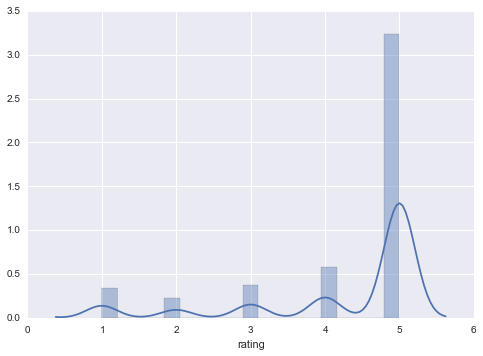

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(giraffe_reviews['rating'])

Or try a horizontal histogram

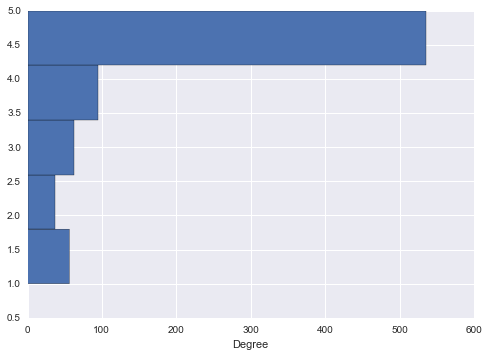

In [18]:
giraffe_reviews['rating'].plot(y='rating', orientation='horizontal', kind='hist', bins=5)

##Build a sentiment classifier
Examine the ratings for **all** the reviews we have:

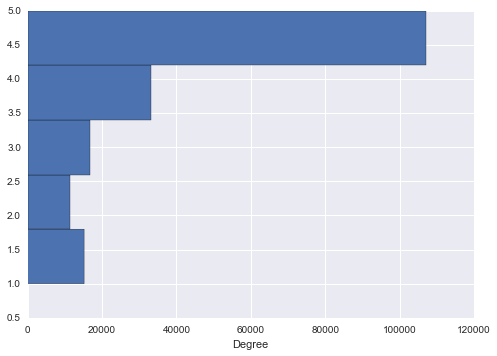

In [19]:
products['rating'].plot(y='rating', orientation='horizontal', kind='hist', bins=5)

##Define what's a positive and a negative sentiment

We will ignore all reviews with rating = 3, since they tend to have a neutral sentiment.  Reviews with a rating of 4 or higher will be considered positive, while the ones with rating of 2 or lower will have a negative sentiment.   

In [20]:
#ignore all 3* reviews
products = products[products['rating'] != 3]

In [21]:
#positive sentiment = 4* or 5* reviews
products['sentiment'] = products['rating'] >=4

In [22]:
products.head()

,name,review,rating,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,True
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,True
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,True
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,True
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,True


##Let's train the sentiment classifier

In [23]:
products.sentiment.value_counts()

True     140259
False     26493
dtype: int64

In [24]:
# Define X and y
X = products['review']
y = products['sentiment']

In [25]:
# split into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print X_train.shape
print X_test.shape

(133401L,)
(33351L,)


In [26]:
# instantiate the vectorizer
vect = CountVectorizer()

In [27]:
# learn training data vocabulary, then create document-term matrix
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_train_dtm

<133401x57485 sparse matrix of type '<type 'numpy.int64'>'
	with 7080210 stored elements in Compressed Sparse Row format>

In [ ]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<33351x57485 sparse matrix of type '<type 'numpy.int64'>'
	with 1749877 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_dtm, y_train)

In [ ]:
# class predictions and predicted probabilities
y_pred_class = logreg.predict(X_test_dtm)
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]

##Evaluate the model 
By looking at its accuracy and its [area under the curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) score:

In [ ]:
# calculate accuracy and AUC
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)
print metrics.roc_auc_score(y_test, y_pred_prob)

And the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix):

In [ ]:
print metrics.confusion_matrix(y_test, y_pred_class)

##Applying the learned model to understand sentiment for Giraffe

Let's see if we can predict the review for the 785 giraffe teether. We first need to transform each review into a document term matrix. We can reuse the vectorizer from earlier since the giraffe reviews were included the last time we used it. Otherwise we could end up with words in the giraffe review that did not exist when we vectorized the corpus of words -- not good.

In [ ]:
# Vectorize each giraffe review
giraffe_vect_dtm = vect.transform(giraffe_reviews['review'])
giraffe_vect_dtm

In [ ]:
giraffe_reviews['predicted_sentiment'] = logreg.predict(giraffe_vect_dtm)

In [ ]:
giraffe_reviews['predicted_sentiment'] = logreg.predict_proba(giraffe_vect_dtm)[:, 1]

In [ ]:
giraffe_reviews.head()

In [ ]:
giraffe_reviews = giraffe_reviews.sort('predicted_sentiment', ascending=False)

In [ ]:
giraffe_reviews.head()

In [ ]:
giraffe_reviews.tail()

#External reading

- https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words
- http://nbviewer.ipython.org/github/justmarkham/DAT8/blob/master/notebooks/14_text_data_sklearn.ipynb
- https://github.com/jakevdp/sklearn_pycon2013/tree/master/notebooks
- http://nbviewer.ipython.org/github/justmarkham/DAT8/tree/master/notebooks/
- https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb